In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_test=pd.read_csv("./Data/test.csv")
data_train=pd.read_csv("./Data/train.csv")
data_sample=pd.read_csv("./Data/sample_submission.csv")
data_store=pd.read_csv("./Data/store.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_15080\2204160662.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train=pd.read_csv("./Data/train.csv")


In [4]:
data_train['Date'] = pd.to_datetime(data_train['Date'])
data_test["Date"]=pd.to_datetime(data_test["Date"])

In [9]:
data_train_sample=pd.DataFrame({
    "Date":data_train["Date"],
    "Sales": data_train["Sales"]
})
data_train_sample

,Date,Sales
0,2015-07-31,5263
1,2015-07-31,6064
2,2015-07-31,8314
3,2015-07-31,13995
4,2015-07-31,4822
...,...,...
1017204,2013-01-01,0
1017205,2013-01-01,0
1017206,2013-01-01,0
1017207,2013-01-01,0


In [23]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series)
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] > 0.05:
        print("Time series is non-stationary")
    else:
        print("Time series is stationary")

# Perform ADF test
adf_test(data_train_sample["sales"])

ADF Statistic: -2.634891406449197
p-value: 0.08599818608635218
Time series is non-stationary


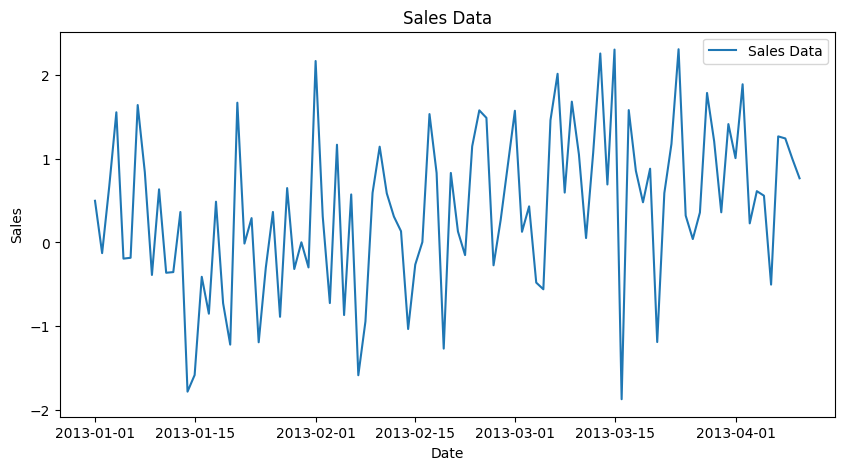

ADF Statistic: -2.634891406449197
p-value: 0.08599818608635218
Fail to reject the null hypothesis - The time series is non-stationary


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Generate synthetic time series data
np.random.seed(42)
date = pd.date_range(start='2013-01-01', periods=100)
sales = np.random.normal(0, 1, size=(100,)) + np.linspace(0, 1, 100)
data_train_sample = pd.DataFrame({'date': date, 'sales': sales})

# Set the date as the index
data_train_sample.set_index('date', inplace=True)

# Select all data for analysis
ts_data = data_train_sample['sales']  # Use the entire 'sales' column

# Step 1: Visualize the data
plt.figure(figsize=(10, 5))
plt.plot(ts_data, label='Sales Data')
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Step 2: Define the ADF test function
def adf_test(series):
    result = adfuller(series)
    return result[0], result[1]  # Return the test statistic and p-value

# Step 3: Perform the ADF test on the entire dataset
adf_stat, p_value = adf_test(ts_data)

# Step 4: Print the results
print('ADF Statistic:', adf_stat)
print('p-value:', p_value)

# Step 5: Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - The time series is stationary")
else:
    print("Fail to reject the null hypothesis - The time series is non-stationary")


In [24]:
sales_data_diff = data_train_sample["sales"].diff().dropna()

adf_test(sales_data_diff)

ADF Statistic: -5.194567863079876
p-value: 9.019393985742185e-06
Time series is stationary


In [35]:
sales_data_diff

date
2013-01-02   -0.624877
2013-01-03    0.796054
2013-01-04    0.885442
2013-01-05   -1.747082
2013-01-06    0.010117
                ...   
2013-04-06   -1.061306
2013-04-07    1.769736
2013-04-08   -0.024964
2013-04-09   -0.245841
2013-04-10   -0.229600
Name: sales, Length: 99, dtype: float64

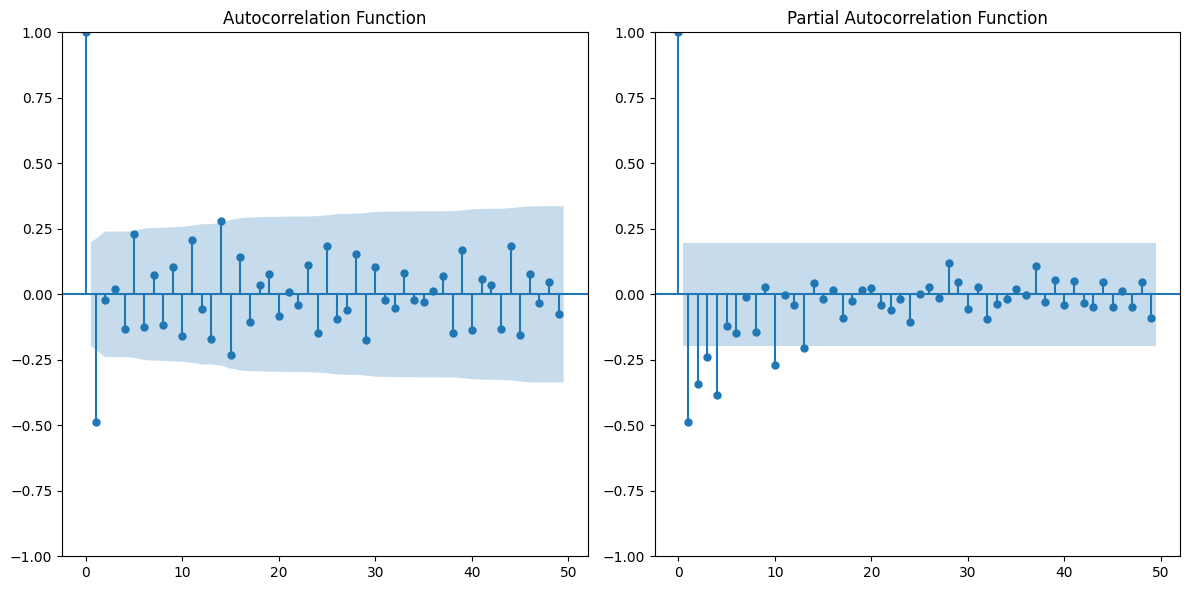

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf




# Step 6: Plot ACF and PACF
plt.figure(figsize=(12, 6))

# Determine the maximum lags based on the size of the data
max_lags = min(50, len(sales_data_diff) // 2)  # Ensure it does not exceed half of the sample size

plt.subplot(121)
plot_acf(sales_data_diff, lags=max_lags, ax=plt.gca())
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(sales_data_diff, lags=max_lags, ax=plt.gca())
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


In [39]:
def create_supervised_data(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

# Create supervised data
window_size = 10  # You can adjust this based on your dataset
X, y = create_supervised_data(sales_data_diff.values, window_size)
print(X)

[[-0.62487744  0.79605385  0.88544233 -1.74708222  0.01011743  1.82345078
  -0.80167708 -1.2268081   1.02213544 -0.99587673]
 [ 0.79605385  0.88544233 -1.74708222  0.01011743  1.82345078 -0.80167708
  -1.2268081   1.02213544 -0.99587673  0.00778895]
 [ 0.88544233 -1.74708222  0.01011743  1.82345078 -0.80167708 -1.2268081
   1.02213544 -0.99587673  0.00778895  0.71779304]
 [-1.74708222  0.01011743  1.82345078 -0.80167708 -1.2268081   1.02213544
  -0.99587673  0.00778895  0.71779304 -2.14514151]
 [ 0.01011743  1.82345078 -0.80167708 -1.2268081   1.02213544 -0.99587673
   0.00778895  0.71779304 -2.14514151  0.19846342]
 [ 1.82345078 -0.80167708 -1.2268081   1.02213544 -0.99587673  0.00778895
   0.71779304 -2.14514151  0.19846342  1.17273131]
 [-0.80167708 -1.2268081   1.02213544 -0.99587673  0.00778895  0.71779304
  -2.14514151  0.19846342  1.17273131 -0.44044258]
 [-1.2268081   1.02213544 -0.99587673  0.00778895  0.71779304 -2.14514151
   0.19846342  1.17273131 -0.44044258  1.33717946]
 

In [38]:
print("Length of sales_data_diff:", len(sales_data_diff))

Length of sales_data_diff: 99


In [40]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (89, 10)
y shape: (89,)


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Scaling data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))


In [42]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape X for LSTM input (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_scaled, y_scaled, epochs=50, batch_size=32)


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1274
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1537  
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1239 
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1147  
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1090 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1180  
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1120 
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1154  
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1340 
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1139  
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1022 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1083 
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1048 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1087 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1061 
Epoch 16/50
3/3 ━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


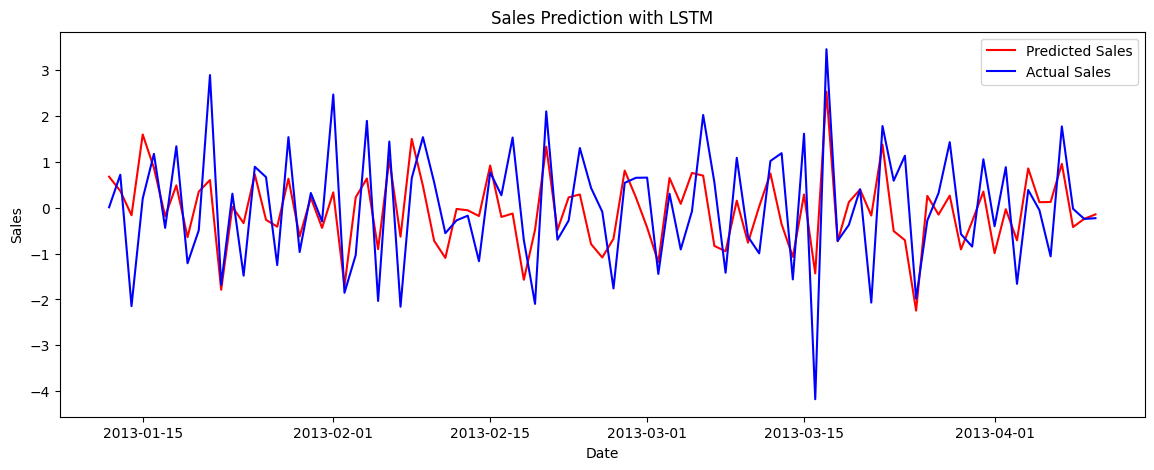

In [47]:
predictions = model.predict(X_scaled)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling

# Visualize the results
plt.figure(figsize=(14, 5))
plt.plot(sales_data_diff.index[window_size:], predictions, color='red', label='Predicted Sales')
plt.plot(sales_data_diff.index[window_size:], sales_data_diff.values[window_size:], color='blue', label='Actual Sales')
plt.title('Sales Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0756 
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0655 
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0615  
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0656 
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0623 
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0653 
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0648  
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0604  
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0604  
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0698  
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0597 
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0712  
Epoch 13/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0734 
Epoch 14/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0636 
Epoch 15/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0656 
Epoch 16/50
3/3 ━━━━━━━━━━━━

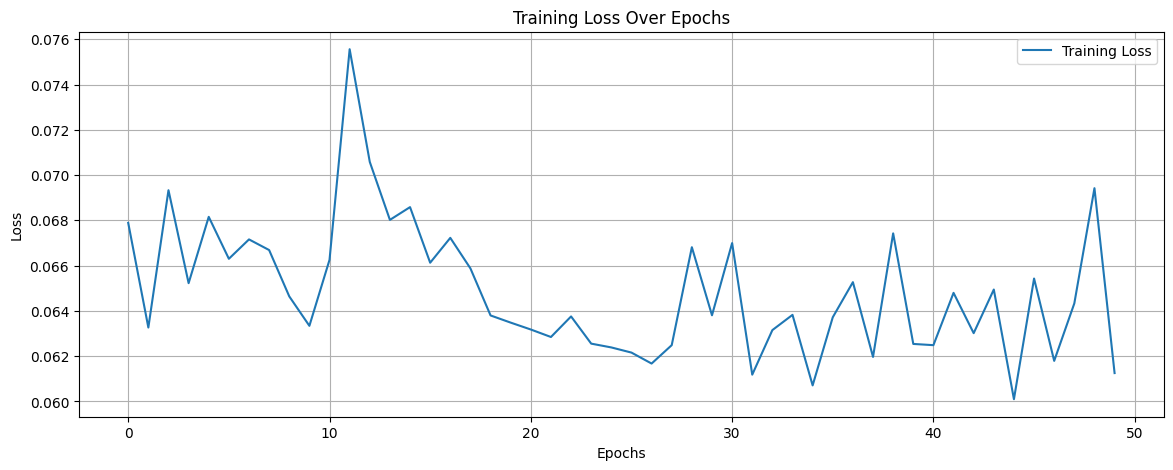

In [49]:
history = model.fit(X_scaled, y_scaled, epochs=50, batch_size=32, verbose=1)
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

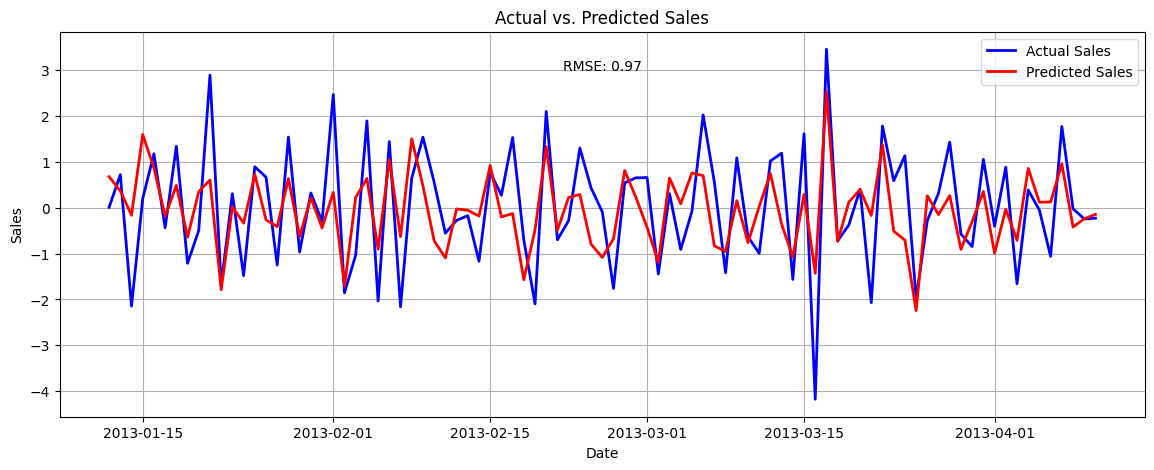

In [50]:
rmse = np.sqrt(np.mean((predictions.flatten() - sales_data_diff.values[window_size:])**2))

# Plot Actual vs Predicted Sales
plt.figure(figsize=(14, 5))
plt.plot(sales_data_diff.index[window_size:], sales_data_diff.values[window_size:], label='Actual Sales', color='blue', linewidth=2)
plt.plot(sales_data_diff.index[window_size:], predictions, label='Predicted Sales', color='red', linewidth=2)
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.text(0.5, 0.9, f'RMSE: {rmse:.2f}', ha='center', transform=plt.gca().transAxes)
plt.show()

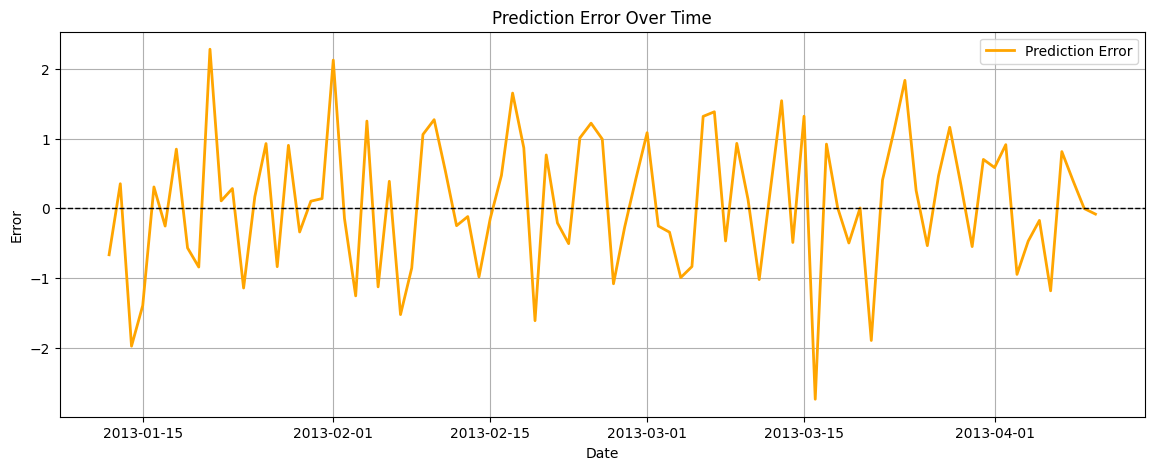

In [51]:
error = sales_data_diff.values[window_size:] - predictions.flatten()

# Plot Prediction Error
plt.figure(figsize=(14, 5))
plt.plot(sales_data_diff.index[window_size:], error, label='Prediction Error', color='orange', linewidth=2)
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Line at zero for reference
plt.title('Prediction Error Over Time')
plt.xlabel('Date')
plt.ylabel('Error')
plt.legend()
plt.grid()
plt.show()

In [55]:
# Predict the next sales
last_window = sales_data_diff.values[-window_size:].reshape(1, window_size, 1)
predicted_scaled = model.predict(last_window)

# Inverse transform the prediction to get the actual sales value
predicted_sales = scaler.inverse_transform(predicted_scaled)

print(f"Predicted sales for the next time step: {predicted_sales[0][0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Predicted sales for the next time step: 2.2304277420043945


In [19]:
data_train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
data_test

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [52]:
data_store

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [7]:
data_sample

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0
